In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score,auc,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Data loading and Learning 

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Cleaning

In [6]:
#Converting TotalCharges data type from object to int and imputing its null value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Imputing null value for Numerical feature "TotalCharges"
df.loc[:, 'TotalCharges'] = df.loc[:, 'TotalCharges'].fillna(df['TotalCharges'].median())

In [9]:
# Drop irrelevant columns
df.drop(['customerID'], axis=1, inplace=True)

In [10]:
# Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### Exploratory Data Analysis

In [12]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService']

In [13]:
print("\nSummary Statistics for Numerical Features:")
print(df[features[:3]].describe())


Summary Statistics for Numerical Features:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


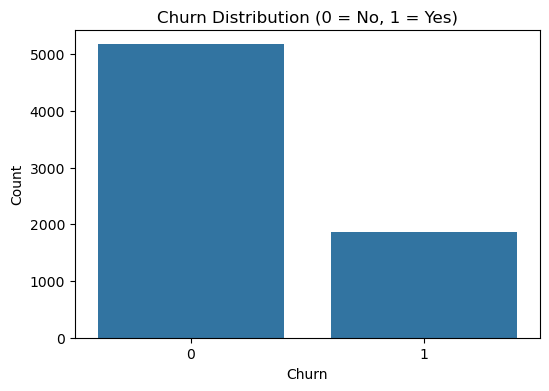


Churn Percentage:
 Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [14]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Print churn percentage
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Percentage:\n", churn_counts.round(2))

In [15]:
#Churn is our target variable and this has uneven distribution, so we will use SMOTE for balancing class weight.

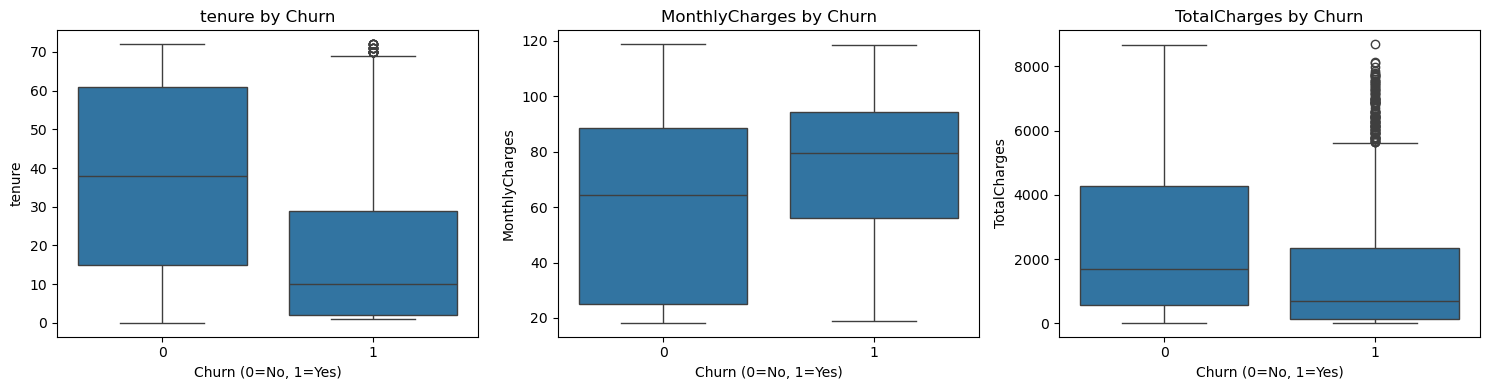

In [16]:
plt.figure(figsize=(15, 4))  # Wider figure to fit 3 plots

# Create 3 subplots in a 1x3 grid
for i, feature in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, position i
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.ylabel(feature)

plt.tight_layout()  # Prevent label overlaps
plt.show()

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

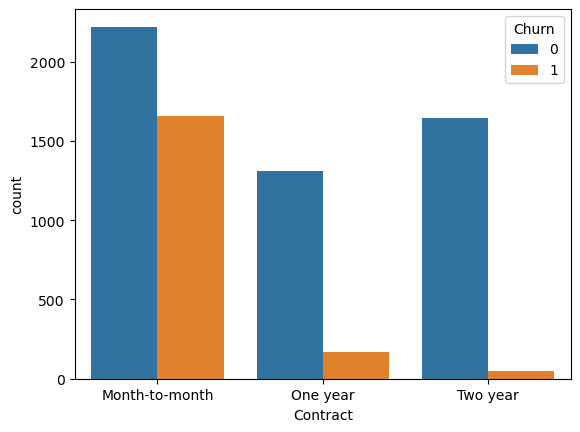

In [17]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

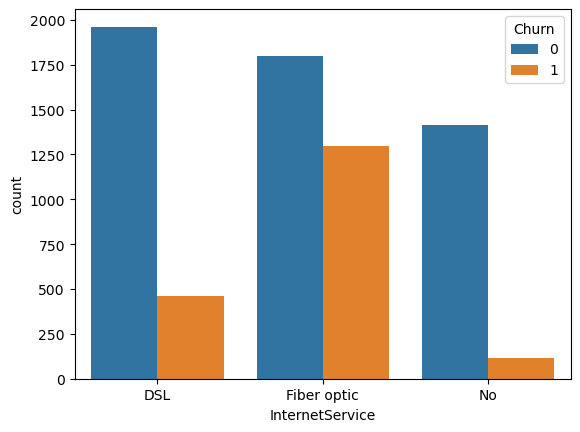

In [18]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title

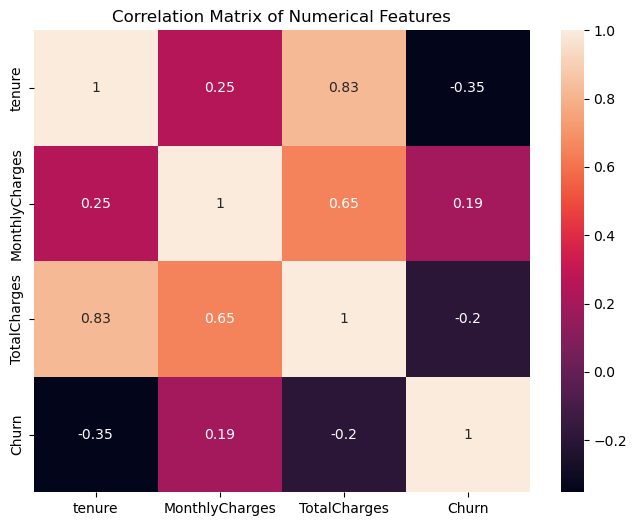

In [19]:
plt.figure(figsize=(8, 6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [20]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                          labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])

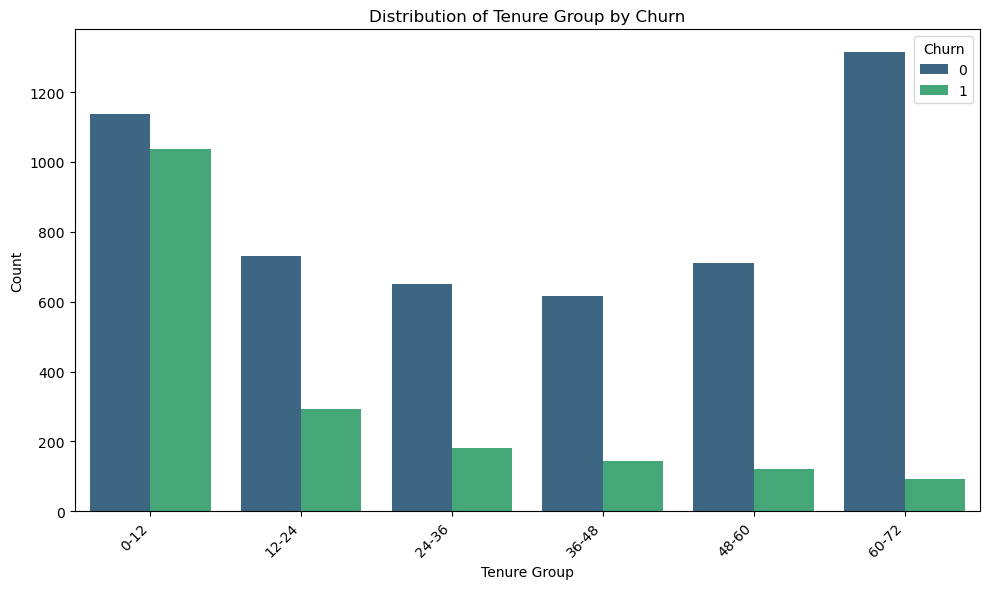

In [21]:
# Distribution of tenure groups by churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TenureGroup', hue='Churn', palette='viridis')
plt.title('Distribution of Tenure Group by Churn')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pre-processing

In [22]:
# Selecting features for modeling
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService']
X = df[features].copy()  # Create a copy to avoid SettingWithCopyWarning
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Define features
categorical_features = ['Contract', 'InternetService']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [24]:
# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

In [25]:
# Convert to DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

In [26]:
# Combine with numerical features
X_train = pd.concat([X_train[numerical_features], X_train_encoded_df], axis=1)
X_test = pd.concat([X_test[numerical_features], X_test_encoded_df], axis=1)

In [27]:
# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [28]:
# Apply SMOTE (optional, but recommended for imbalanced data)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### Model Training and Evaluation

In [29]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

In [30]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution after SMOTE:
Churn
0    4138
1    4138
Name: count, dtype: int64


In [31]:
# List to store results
results = []

# Loop through each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Metrics for class '1' (churn)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['1']
    
    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['precision'],
        'Recall': report['recall'],
        'F1-Score': report['f1-score'],
        'ROC-AUC': roc_auc_score(y_test, y_proba) 
    })

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\nClassifier Comparison:")
print(results_df)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      1036
           1       0.51      0.85      0.64       373

    accuracy                           0.74      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.74      0.76      1409


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1036
           1       0.51      0.60      0.55       373

    accuracy                           0.74      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.74      0.75      1409


Classifier Comparison:
            Classifier  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression   0.74379   0.509677  0.847185  0.636455  0.854316
1        Random Forest   0.74450   0.514943  0.600536  0.554455  0.791285


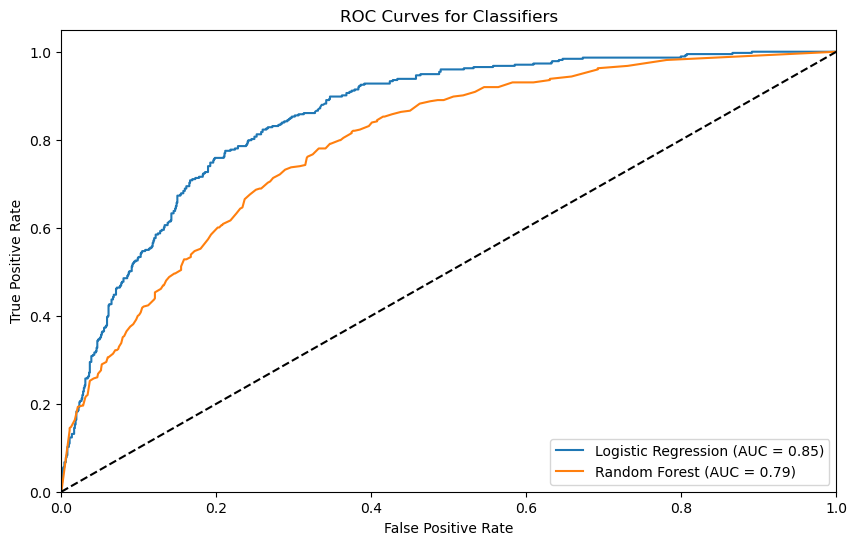

In [32]:
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    # Train the model if not already trained
    clf.fit(X_train_balanced, y_train_balanced)
    # Get predicted probabilities
    if hasattr(clf, "predict_proba"):
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.show()